# **Tugas Praktikum**

---

Tugas 1: Multiple Linear Regression

Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

Lakukan feature scaling jika diperlukan.

Buat model multiple linear regression menggunakan Scikit-Learn.

Latih model pada data latih dan lakukan prediksi pada data uji.

Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Bentuk X_train_final (dengan bias X0): (1070, 9)
Bentuk X_test_final (dengan bias X0): (268, 9)

Menghitung koefisien (theta) menggunakan Normal Equation...
Koefisien (theta) berhasil dihitung.
Melakukan prediksi pada data uji...
Menghitung metrik evaluasi secara manual...

--- Hasil Evaluasi Model (Manual Normal Equation) ---
R-squared (R²): 0.7836
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
-------------------------------------------------------

Membuat visualisasi perbandingan nilai aktual vs. prediksi...
Plot telah disimpan sebagai 'regression_manual_actual_vs_predicted.png'


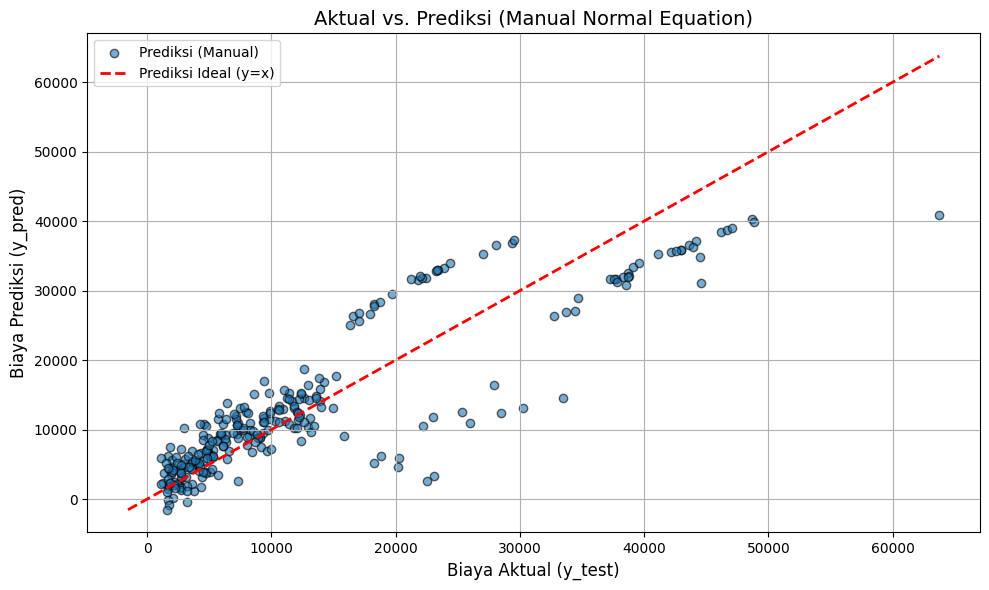

In [ ]:
# ---------------------------------------------------------------------------
# 1. Memuat dan Pra-pemrosesan Data (Sama seperti sebelumnya)
# ---------------------------------------------------------------------------
try:
    file_path = '/content/insurance.csv'
    df = pd.read_csv(file_path)

    # Pra-pemrosesan: One-Hot Encoding
    df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    # ---------------------------------------------------------------------------
    # 2. Identifikasi Fitur (X) dan Target (y)
    # ---------------------------------------------------------------------------
    y = df_processed['charges']
    X = df_processed.drop('charges', axis=1)

    # ---------------------------------------------------------------------------
    # 3. Pembagian Data Latih dan Data Uji
    # ---------------------------------------------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ---------------------------------------------------------------------------
    # 4. Feature Scaling
    # ---------------------------------------------------------------------------
    # Walaupun Normal Equation tidak *memerlukan* scaling,
    # kita tetap melakukannya agar konsisten dengan eksekusi sebelumnya dan
    # untuk memastikan matriks dapat di-inverse dengan stabil.

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ---------------------------------------------------------------------------
    # 5. MENAMBAHKAN BIAS/INTERCEPT TERM (X0)
    # ---------------------------------------------------------------------------
    # Ini langkah krusial untuk Normal Equation.
    # Kita perlu menambahkan kolom berisi angka 1 (X0) ke data fitur kita.
    # Ini mewakili 'intercept' (b) dalam persamaan y = mx + b.

    # Menambahkan kolom '1' di awal matriks X_train
    # np.c_ adalah cara numpy untuk menggabungkan kolom
    X_train_final = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

    # Menambahkan kolom '1' di awal matriks X_test
    X_test_final = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    print(f"Bentuk X_train_final (dengan bias X0): {X_train_final.shape}")
    print(f"Bentuk X_test_final (dengan bias X0): {X_test_final.shape}")

    # ---------------------------------------------------------------------------
    # 6. Pelatihan Model "Manual" (Normal Equation)
    # ---------------------------------------------------------------------------
    print("\nMenghitung koefisien (theta) menggunakan Normal Equation...")

    # theta = (X^T * X)^-1 * X^T * y

    try:
        # X^T
        X_T = X_train_final.T

        # X^T * X
        X_T_X = X_T.dot(X_train_final)

        # (X^T * X)^-1
        X_T_X_inv = np.linalg.inv(X_T_X)

        # X^T * y
        X_T_y = X_T.dot(y_train)

        # theta = (X^T * X)^-1 * (X^T * y)
        theta = X_T_X_inv.dot(X_T_y)

        print("Koefisien (theta) berhasil dihitung.")
        # print("Theta:", theta)

    except np.linalg.LinAlgError:
        print("Error: Matriks (X^T X) bersifat singular, tidak dapat di-inverse.")
        theta = None

    if theta is not None:
        # ---------------------------------------------------------------------------
        # 7. Prediksi "Manual" pada Data Uji
        # ---------------------------------------------------------------------------
        # y_pred = X_test * theta
        print("Melakukan prediksi pada data uji...")
        y_pred = X_test_final.dot(theta)

        # ---------------------------------------------------------------------------
        # 8. Evaluasi Model "Manual"
        # ---------------------------------------------------------------------------
        print("Menghitung metrik evaluasi secara manual...")

        # Mengubah y_test (pandas Series) menjadi numpy array agar konsisten
        y_test_np = y_test.to_numpy()

        # n (jumlah data uji)
        n = len(y_test_np)

        # Residuals (selisih aktual - prediksi)
        residuals = y_test_np - y_pred

        # MAE (Mean Absolute Error)
        # MAE = (1/n) * sum(|y_aktual - y_prediksi|)
        mae_manual = np.sum(np.abs(residuals)) / n

        # MSE (Mean Squared Error)
        # MSE = (1/n) * sum((y_aktual - y_prediksi)^2)
        ss_res = np.sum(residuals**2)
        mse_manual = ss_res / n

        # R-squared (R²)
        # R² = 1 - (SS_res / SS_tot)
        # SS_tot = sum((y_aktual - y_rata_rata)^2)
        y_mean = np.mean(y_test_np)
        ss_tot = np.sum((y_test_np - y_mean)**2)
        r2_manual = 1 - (ss_res / ss_tot)

        print("\n--- Hasil Evaluasi Model (Manual Normal Equation) ---")
        print(f"R-squared (R²): {r2_manual:.4f}")
        print(f"Mean Squared Error (MSE): {mse_manual:.2f}")
        print(f"Mean Absolute Error (MAE): {mae_manual:.2f}")
        print("-------------------------------------------------------")

        # ---------------------------------------------------------------------------
        # 9. Visualisasi Hasil (Sama seperti sebelumnya)
        # ---------------------------------------------------------------------------
        print("\nMembuat visualisasi perbandingan nilai aktual vs. prediksi...")
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label='Prediksi (Manual)')

        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prediksi Ideal (y=x)')

        plt.xlabel('Biaya Aktual (y_test)', fontsize=12)
        plt.ylabel('Biaya Prediksi (y_pred)', fontsize=12)
        plt.title('Aktual vs. Prediksi (Manual Normal Equation)', fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        plot_filename = 'regression_manual_actual_vs_predicted.png'
        plt.savefig(plot_filename)
        print(f"Plot telah disimpan sebagai '{plot_filename}'")

except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Analisis Hasil

R-squared (R²): Nilai R² sebesar $0.7836$ menunjukkan bahwa sekitar $78.36\%$ variasi dalam biaya medis (charges) dapat dijelaskan oleh fitur-fitur yang digunakan dalam model (usia, bmi, jumlah anak, status perokok, jenis kelamin, dan wilayah). Ini adalah tingkat kecocokan (fit) yang cukup baik.

Mean Absolute Error (MAE): Nilai MAE sebesar $\$4,181.19$. Ini adalah metrik yang paling mudah diinterpretasikan; secara rata-rata, prediksi model meleset sekitar $\$4,181$ dari biaya medis yang sebenarnya.

Mean Squared Error (MSE): Nilai MSE sangat besar karena metrik ini mengkuadratkan selisih error. Nilai yang tinggi ini sensitif terhadap beberapa prediksi yang memiliki selisih sangat jauh (outlier).